In [1]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r"C:\Users\saiki\Downloads\Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [4]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
435    False
436    False
437    False
438    False
439    False
Length: 440, dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [8]:
df.shape

(440, 8)

In [9]:
df.Channel.unique()

array([2, 1], dtype=int64)

In [10]:
df.Region.unique()

array([3, 1, 2], dtype=int64)

In [11]:
import seaborn as sns

In [12]:
df['Channel'].value_counts()


Channel
1    298
2    142
Name: count, dtype: int64

<Axes: xlabel='Channel', ylabel='count'>

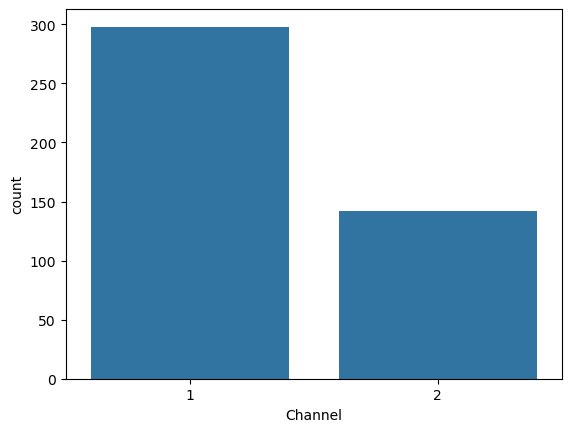

In [13]:
sns.countplot(x=df['Channel'])

<Axes: xlabel='Region', ylabel='count'>

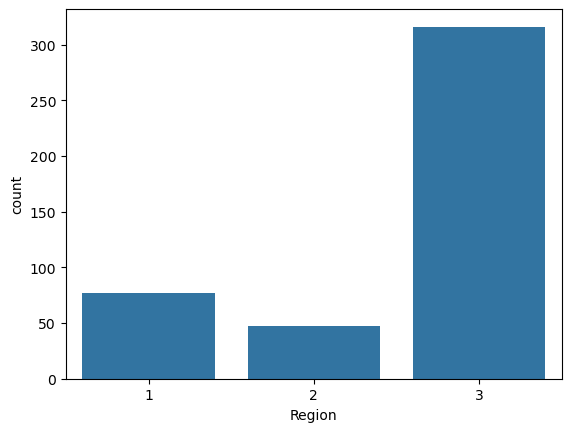

In [14]:
sns.countplot(x=df['Region'])

In [15]:
import warnings
warnings.filterwarnings('ignore')


<Axes: ylabel='Density'>

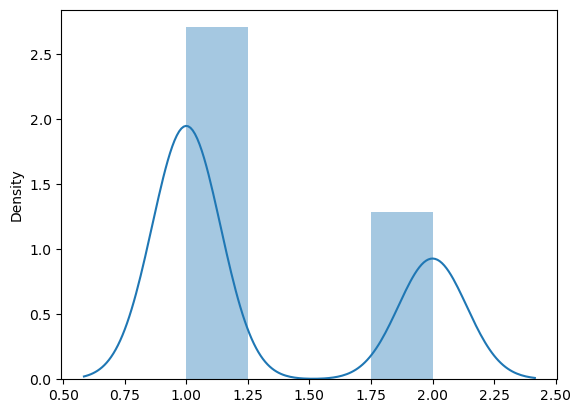

In [16]:
sns.distplot(x=df['Channel'])

<Axes: ylabel='Density'>

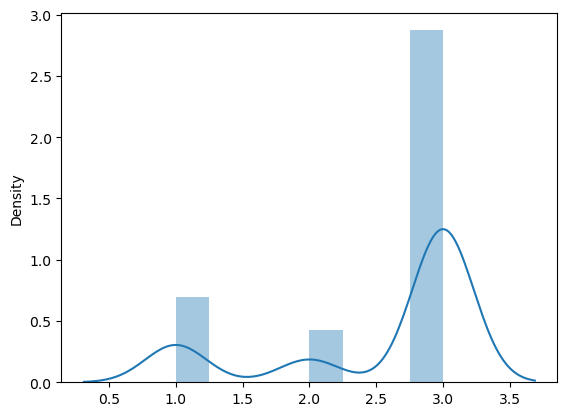

In [17]:
sns.distplot(x=df['Region'])

<Axes: ylabel='Density'>

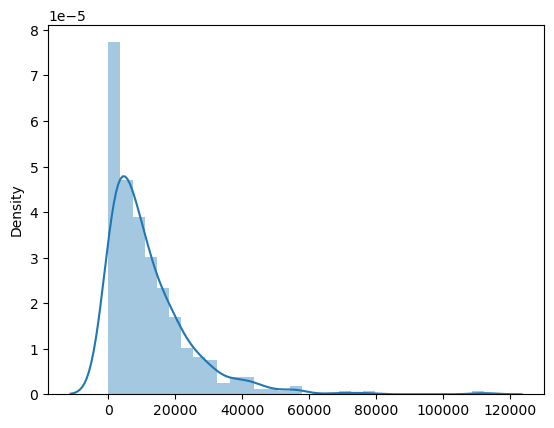

In [18]:
sns.distplot(x=df['Fresh'])

<Axes: ylabel='Density'>

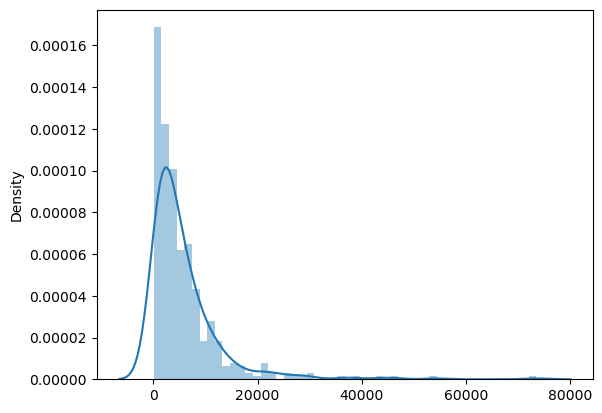

In [19]:
sns.distplot(x=df['Milk'])

<Axes: ylabel='Density'>

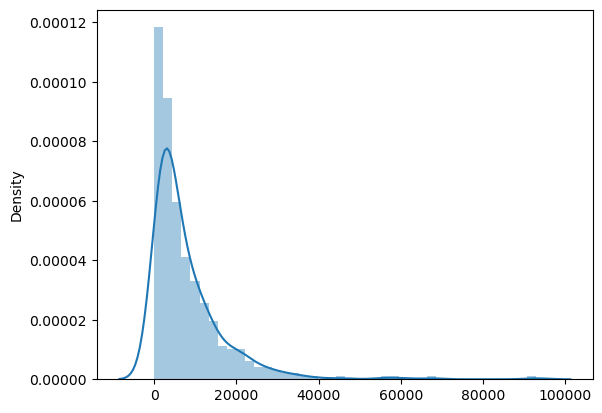

In [20]:
sns.distplot(x=df['Grocery'])

<Axes: ylabel='Density'>

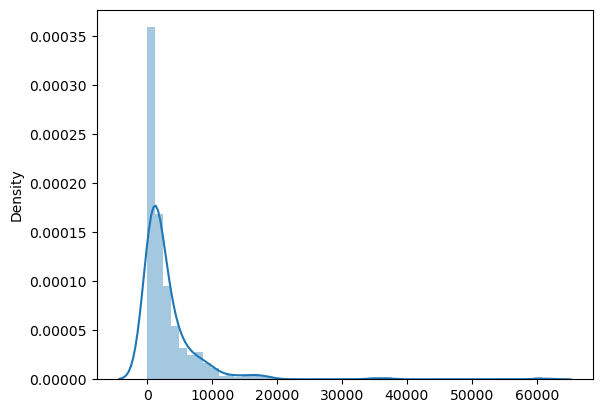

In [21]:
sns.distplot(x=df['Frozen'])

In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


<Axes: ylabel='Density'>

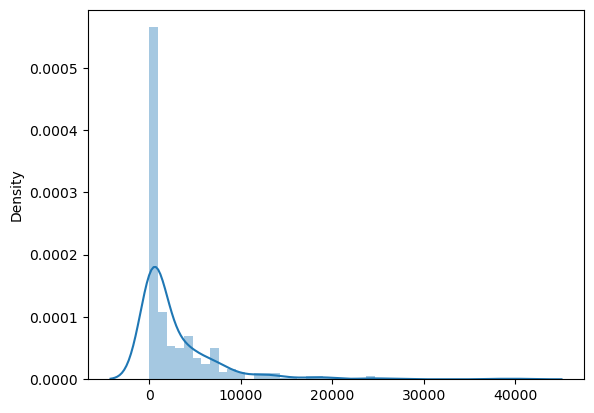

In [23]:
sns.distplot(x=df['Detergents_Paper'])

<Axes: ylabel='Density'>

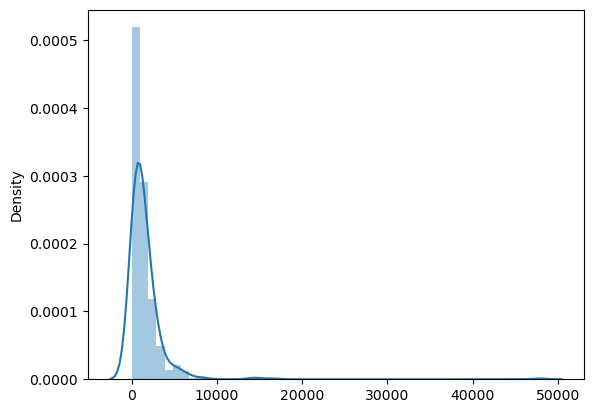

In [24]:
sns.distplot(x=df['Delicassen'])

In [25]:
df.min()


Channel              1
Region               1
Fresh                3
Milk                55
Grocery              3
Frozen              25
Detergents_Paper     3
Delicassen           3
dtype: int64

In [26]:
df.max()

Channel                  2
Region                   3
Fresh               112151
Milk                 73498
Grocery              92780
Frozen               60869
Detergents_Paper     40827
Delicassen           47943
dtype: int64

In [27]:
df.drop(['Channel','Region'],axis=1,inplace=True)

In [28]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [29]:
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler()
x = stscaler.fit_transform(df)

In [30]:
x

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [31]:
import scipy.cluster.hierarchy as sch


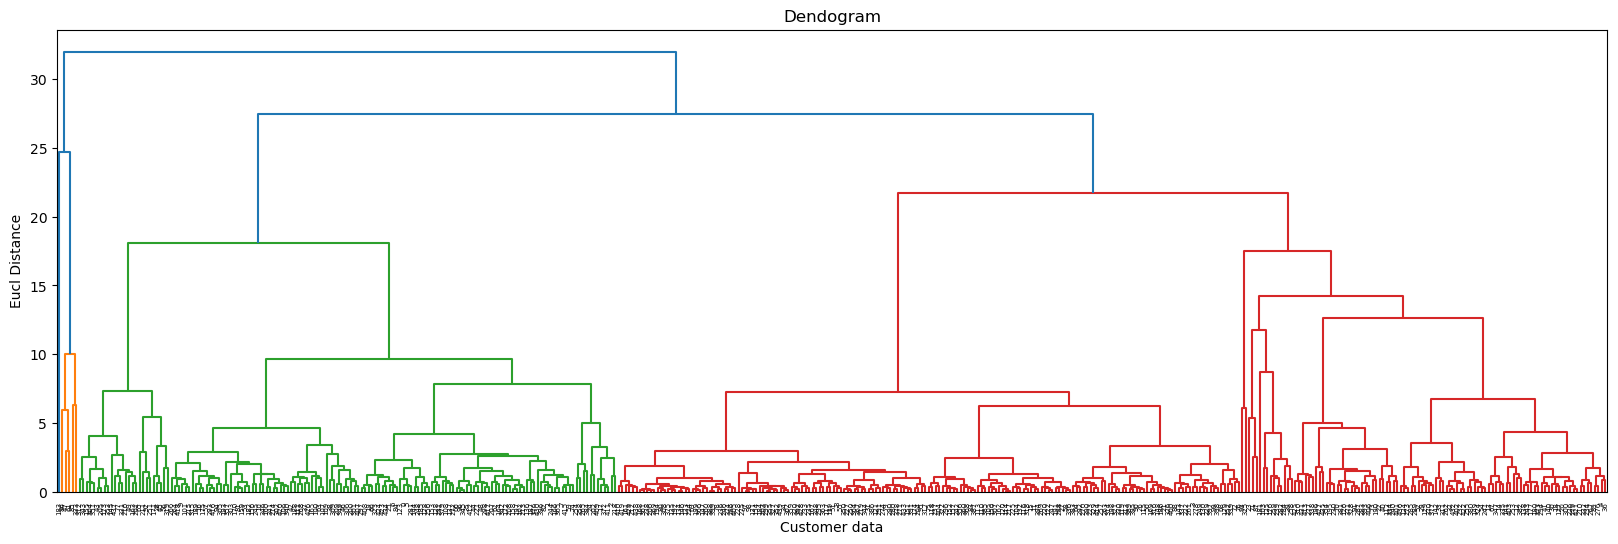

In [32]:
plt.figure(figsize=(20,6))
dendo = sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendogram')
plt.xlabel('Customer data')
plt.ylabel('Eucl Distance')
plt.show()

In [33]:
len(set(dendo['color_list']))-1

3

In [34]:
len(set(dendo['color_list'])) # to know color

4

In [35]:
from sklearn.cluster import AgglomerativeClustering

In [36]:
model=AgglomerativeClustering(n_clusters=3)
cluster=model.fit_predict(x)

In [37]:
cluster


array([2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1,

In [38]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [39]:
group_num = pd.DataFrame(cluster,columns=['Group'])
group_num

,Group
0,2
1,2
2,2
3,1
4,1
...,...
435,1
436,1
437,2
438,1


In [40]:
cust_group_data = pd.concat([df,group_num],axis=1)

In [41]:
cust_group_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1
436,39228,1431,764,4510,93,2346,1
437,14531,15488,30243,437,14841,1867,2
438,10290,1981,2232,1038,168,2125,1


In [42]:
from sklearn.metrics import silhouette_score

In [43]:
silhouette_score(x,cluster)

0.2646091480214908

# KMeans

In [44]:
x

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [45]:
from sklearn.cluster import KMeans
WCSS =[]
for i in range(2,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)

In [46]:
WCSS

[2266.9552665832452,
 1644.0598512347563,
 1326.674608213553,
 1070.2551995135614,
 989.3326418885057,
 856.7070228388116,
 791.8280762163155,
 710.1943394067519,
 668.2225054846901]

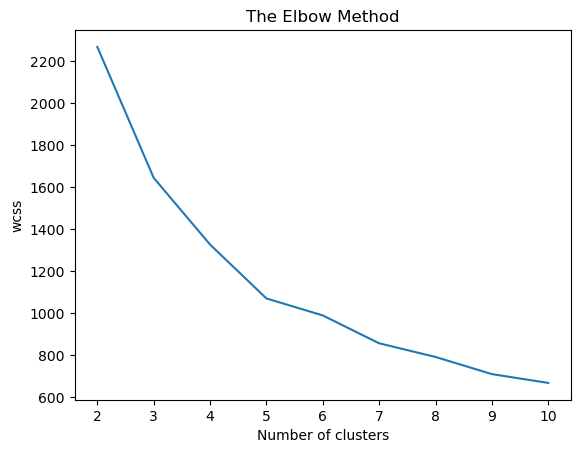

In [52]:
plt.plot(range(2,11),WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [55]:
model = KMeans(n_clusters=4,random_state=42)
groups=model.fit_predict(x)
print(groups)

[3 0 0 3 3 3 3 3 3 0 0 3 0 0 0 3 0 3 3 3 3 3 3 1 0 3 3 3 0 3 3 3 3 3 3 0 3
 0 0 3 3 3 0 0 0 0 0 2 0 0 3 3 3 0 3 3 2 0 3 3 3 2 3 0 3 2 3 0 3 3 3 1 3 3
 3 3 3 0 3 3 3 0 0 3 3 2 2 1 3 3 3 3 2 1 0 3 3 3 3 3 0 0 0 3 3 3 0 0 0 0 3
 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3
 3 3 3 3 3 3 3 0 0 3 0 0 0 3 3 0 0 0 0 3 3 3 0 0 3 0 3 0 3 3 3 3 3 1 0 1 3
 3 3 0 0 0 3 3 3 0 3 3 3 0 3 3 0 0 3 3 3 0 3 3 3 0 3 2 3 0 0 0 0 3 0 3 3 0
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 3 3 3 3 3 2 3 3 0 3 3 3 3
 3 3 3 3 3 0 0 0 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3
 3 3 0 3 3 0 0 0 0 0 0 3 3 0 3 3 0 3 3 0 3 3 3 0 3 3 3 3 3 1 3 3 3 3 3 0 3
 2 3 3 3 3 3 3 0 0 0 0 3 3 0 3 3 0 3 0 3 0 3 3 3 0 0 3 3 3 3 3 3 0 3 3 3 3
 3 3 3 3 3 3 0 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3
 0 3 3 3 3 0 3 3 3 0 0 0 3 0 3 3 3 3 3 0 3 3 3 0 3 3 3 3 3 3 0 3 3]


In [56]:
groups.shape

(440,)

In [57]:
group_num=pd.DataFrame(groups,columns=['Group'])
group_num

,Group
0,3
1,0
2,0
3,3
4,3
...,...
435,3
436,3
437,0
438,3


In [58]:
cust_kmeans_data=pd.concat([df,group_num],axis=1)
cust_kmeans_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,12669,9656,7561,214,2674,1338,3
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,3
4,22615,5410,7198,3915,1777,5185,3
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,3
436,39228,1431,764,4510,93,2346,3
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,3


In [66]:
silhouette_score(x,groups)

0.36890127429678043

In [67]:
model = KMeans(n_clusters=5,random_state=42)
groups=model.fit_predict(x)
print(groups)

[3 0 0 3 1 3 3 3 3 0 0 3 1 0 0 3 0 3 3 3 3 3 1 2 0 3 3 3 0 1 3 3 3 1 3 0 1
 0 0 1 1 3 0 0 0 0 0 2 0 0 3 3 1 0 1 3 2 0 3 3 3 2 3 0 3 2 3 0 3 3 1 1 3 1
 3 3 3 0 3 3 3 0 0 3 3 2 2 1 3 1 3 3 2 1 0 3 3 3 3 3 0 0 3 1 3 3 0 0 3 0 3
 0 1 3 3 3 3 3 3 3 3 3 3 3 1 1 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 1 1 3 3 0 3 3
 3 1 3 3 3 3 3 0 0 3 0 0 0 3 3 0 3 0 0 3 3 3 0 0 3 0 3 0 1 3 3 3 3 1 0 4 3
 3 3 3 0 0 3 3 3 0 3 3 1 0 3 3 0 0 1 3 3 0 3 3 3 0 3 2 3 3 0 0 0 3 0 3 3 0
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 3 3 3 0 0 3 3 3 3 3 2 3 1 0 1 3 3 1
 1 3 3 3 3 0 0 0 3 0 3 3 3 3 1 3 3 1 3 3 3 3 3 1 1 1 1 3 3 3 1 3 3 3 0 3 3
 3 3 3 3 3 0 0 0 0 0 0 3 3 0 3 1 0 3 3 0 3 3 3 0 3 3 3 3 3 4 3 3 3 3 3 0 3
 2 1 1 3 3 3 3 0 0 3 0 3 3 0 1 3 0 3 0 3 0 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3
 1 1 3 3 3 3 0 1 3 3 1 1 1 3 0 3 3 3 3 3 3 3 3 1 3 3 0 3 3 3 3 1 3 3 3 3 1
 0 3 3 3 3 3 1 3 3 0 3 0 3 0 3 3 3 3 1 0 1 3 3 3 3 3 3 3 1 1 0 3 3]


In [68]:
groups.shape

(440,)

In [69]:
group_num=pd.DataFrame(groups,columns=['Group'])
group_num

,Group
0,3
1,0
2,0
3,3
4,1
...,...
435,1
436,1
437,0
438,3


In [70]:
cust_kmeans_data=pd.concat([df,group_num],axis=1)
cust_kmeans_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,12669,9656,7561,214,2674,1338,3
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,3
4,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1
436,39228,1431,764,4510,93,2346,1
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,3


In [72]:
silhouette_score(x,groups)

0.36890127429678043